# Análise de Gênero nos Cursos de Exatas e Humanas - Censo de 2022

Este pequeno projeto realiza uma análise das matrículas e conclusões de cursos de Exatas e Humanas a partir dos microdados do Censo da Educação Superior 2022, com foco em questões de gênero.
O objetivo é compreender como homens e mulheres estão distribuídos em diferentes áreas do conhecimento, usando técnicas de visualização e testes estatísticos.


## 1. Importação de Bibliotecas

Aqui, importamos as bibliotecas essenciais para a análise de dados, como Pandas para manipulação de DataFrames, NumPy para operações numéricas, e Matplotlib para visualização.


In [1]:
import pandas as pd
import numpy as np 
import scipy.stats as stats
from statsmodels.stats.proportion import proportions_ztest
import matplotlib.pyplot as plt

## 2. Carregamento dos Dados

Vamos carregar os microdados do Censo da Educação Superior 2022 para iniciar nossa análise. Esses dados incluem informações sobre matrículas e conclusões de cursos em diversas áreas de estudo.


In [4]:
df = pd.read_csv(r'data/MICRODADOS_CADASTRO_CURSOS_2022.CSV', 
        sep=';', encoding='latin1', low_memory=False)


## 3. Tratamento dos Dados

Nesta etapa, realizamos o tratamento e a organização dos dados de acordo com os objetivos do projeto. Foram aplicadas técnicas de limpeza, transformação e ordenação, além da definição das variáveis relevantes para a análise. Esse processo foi essencial para garantir a consistência e a qualidade dos dados, permitindo uma análise precisa e confiável.


In [37]:
# Verificando a primeira linha dos dados

print(df.head())

# Imprimindo todas colunas

df.columns.tolist()

# Agrupar por curso e gênero

cursos_populares = df.groupby('NO_CURSO').agg({
    'QT_MAT_FEM': 'sum',  # Total de matrículas femininas
    'QT_MAT_MASC': 'sum',  # Total de matrículas masculinas
}).reset_index()

# Ordenar para ver os cursos mais populares

cursos_populares = cursos_populares.sort_values(by='QT_MAT_FEM', ascending=False)

# Selecionar os top 10 cursos mais populares

top_cursos = cursos_populares.head(10)

   NU_ANO_CENSO NO_REGIAO  CO_REGIAO NO_UF SG_UF  CO_UF NO_MUNICIPIO  \
0          2022       NaN          0   NaN   NaN      0          NaN   
1          2022       NaN          0   NaN   NaN      0          NaN   
2          2022       NaN          0   NaN   NaN      0          NaN   
3          2022       NaN          0   NaN   NaN      0          NaN   
4          2022       NaN          0   NaN   NaN      0          NaN   

   CO_MUNICIPIO  IN_CAPITAL  TP_DIMENSAO  ...  QT_MAT_APOIO_SOCIAL  \
0             0           0            2  ...                    0   
1             0           0            3  ...                    0   
2             0           0            3  ...                    0   
3             0           0            3  ...                    0   
4             0           0            3  ...                    0   

   QT_CONC_APOIO_SOCIAL  QT_ATIV_EXTRACURRICULAR  QT_ING_ATIV_EXTRACURRICULAR  \
0                     0                        0                 

In [4]:
# Verificando os valores únicos na coluna NO_CINE_AREA_GERAL

print(df['NO_CINE_AREA_GERAL'].unique())

['Programas básicos' 'Negócios, administração e direito'
 'Ciências naturais, matemática e estatística' 'Educação'
 'Ciências sociais, comunicação e informação'
 'Engenharia, produção e construção'
 'Computação e Tecnologias da Informação e Comunicação (TIC)' 'Serviços'
 'Artes e humanidades' 'Agricultura, silvicultura, pesca e veterinária'
 'Saúde e bem-estar']


In [38]:
# Definir áreas de Exatas e Humanas
exatas = ['Ciências naturais, matemática e estatística', 'Engenharia, produção e construção', 'Computação e Tecnologias da Informação e Comunicação (TIC)']
humanas = ['Negócios, administração e direito', 'Educação', 'Ciências sociais, comunicação e informação', 'Artes e humanidades']

# Filtrar cursos de exatas e humanas
df_exatas = df[df['NO_CINE_AREA_GERAL'].isin(exatas)]
df_humanas = df[df['NO_CINE_AREA_GERAL'].isin(humanas)]

# Top 10 cursos de Exatas com mais matrículas
top_exatas = (
    df_exatas[~df_exatas['NO_CURSO'].isin(['Arquitetura E Urbanismo'])]
    .groupby('NO_CURSO')
    .agg({
        'QT_MAT_FEM': 'sum',
        'QT_MAT_MASC': 'sum'
    })
    .assign(TOTAL_MATRICULAS=lambda x: x['QT_MAT_FEM'] + x['QT_MAT_MASC'])
    .sort_values(by='TOTAL_MATRICULAS', ascending=False)
    .head(10)
)

# Top 10 cursos de Humanas com mais matrículas
top_humanas = (
    df_humanas[~df_humanas['NO_CURSO'].isin(['Educação Física', 'Matemática', 'Ciências Contábeis'])]
    .groupby('NO_CURSO')
    .agg({
        'QT_MAT_FEM': 'sum', 
        'QT_MAT_MASC': 'sum'
    })
    .assign(TOTAL_MATRICULAS=lambda x: x['QT_MAT_FEM'] + x['QT_MAT_MASC'])
    .sort_values(by='TOTAL_MATRICULAS', ascending=False)
    .head(10)
)


## 4. Análise Estatística

Nesta etapa, realizamos cálculos estatísticos relevantes para obter insights significativos sobre os dados. Essas estatísticas nos ajudam a identificar padrões, comportamentos e tendências que podem enriquecer nossa análise e fornecer uma compreensão mais profunda do conjunto de dados.


In [40]:
# Exatas
total_exatas = df_exatas['QT_MAT_FEM'].sum() + df_exatas['QT_MAT_MASC'].sum() 

proporcao_fem_exatas = df_exatas['QT_MAT_FEM'].sum() / total_exatas

proporcao_masc_exatas = df_exatas['QT_MAT_MASC'].sum() / total_exatas

# Humanas
total_humanas = df_humanas['QT_MAT_FEM'].sum() + df_humanas['QT_MAT_MASC'].sum()
proporcao_fem_humanas = df_humanas['QT_MAT_FEM'].sum() / total_humanas
proporcao_masc_humanas = df_humanas['QT_MAT_MASC'].sum() / total_humanas

print(f"Proporção de Mulheres em Exatas: {proporcao_fem_exatas:.2f}")
print(f"Proporção de Homens em Exatas: {proporcao_masc_exatas:.2f}")
print(f"Proporção de Mulheres em Humanas: {proporcao_fem_humanas:.2f}")
print(f"Proporção de Homens em Humanas: {proporcao_masc_humanas:.2f}")

print(f"Número total de Exatas: {total_exatas}")
print(f"Número total de Humanas: {total_humanas}")


Proporção de Mulheres em Exatas: 0.28
Proporção de Homens em Exatas: 0.72
Proporção de Mulheres em Humanas: 0.64
Proporção de Homens em Humanas: 0.36
Número total de Exatas: 1627086
Número total de Humanas: 5106623


In [7]:
# Função para calcular intervalo de confiança de uma proporção
def intervalo_confianca_proporcao(p, n, z=1.96):
    erro_padrao = np.sqrt((p * (1 - p)) / n)
    intervalo_inferior = p - z * erro_padrao
    intervalo_superior = p + z * erro_padrao
    return intervalo_inferior, intervalo_superior

def formatar_intervalo(intervalo):
    return f'({intervalo[0]:.4f}, {intervalo[1]:.4f})'

# Intervalos de confiança
ic_mulheres_exatas = intervalo_confianca_proporcao(proporcao_fem_exatas, total_exatas)
ic_homens_exatas = intervalo_confianca_proporcao(proporcao_masc_exatas, total_exatas)
ic_mulheres_humanas = intervalo_confianca_proporcao(proporcao_fem_humanas, total_humanas)
ic_homens_humanas = intervalo_confianca_proporcao(proporcao_masc_humanas, total_humanas)

# Exibir os resultados
print("Intervalo de Confiança para Mulheres em Exatas:", formatar_intervalo(ic_mulheres_exatas))
print("Intervalo de Confiança para Homens em Exatas:", formatar_intervalo(ic_homens_exatas))
print("Intervalo de Confiança para Mulheres em Humanas:", formatar_intervalo(ic_mulheres_humanas))
print("Intervalo de Confiança para Homens em Humanas:", formatar_intervalo(ic_homens_humanas))


Intervalo de Confiança para Mulheres em Exatas: (0.2790, 0.2803)
Intervalo de Confiança para Homens em Exatas: (0.7197, 0.7210)
Intervalo de Confiança para Mulheres em Humanas: (0.6383, 0.6391)
Intervalo de Confiança para Homens em Humanas: (0.3609, 0.3617)


In [8]:

homens_exatas = total_exatas * proporcao_masc_exatas  # Número de homens em Exatas
homens_humanas = total_humanas * proporcao_masc_humanas  # Número de homens em Humanas


# Contadores e observações
count = np.array([homens_exatas, homens_humanas])
nobs = np.array([total_exatas, total_humanas])

# Teste de hipóteses
stat, p_value = proportions_ztest(count, nobs)

print(f"Estatística do teste: {stat:.2f}")
print(f"Valor-p: {p_value:.5f}")

if p_value < 0.05:
    print("As proporções de homens em Exatas e Humanas são significativamente diferentes.")
else:
    print("Não há diferença significativa nas proporções de homens entre Exatas e Humanas.")


Estatística do teste: 801.96
Valor-p: 0.00000
As proporções de homens em Exatas e Humanas são significativamente diferentes.


In [9]:
# Número de mulheres em Exatas e Humanas
mulheres_exatas = total_exatas * proporcao_fem_exatas
mulheres_humanas = total_humanas * proporcao_fem_humanas

# Contadores e observações
count = np.array([mulheres_exatas, mulheres_humanas])
nobs = np.array([total_exatas, total_humanas])

# Teste de hipóteses
stat, p_value = proportions_ztest(count, nobs)

print(f"Estatística do teste: {stat:.2f}")
print(f"Valor-p: {p_value:.5f}")

if p_value < 0.05:
    print("As proporções de mulheres em Exatas e Humanas são significativamente diferentes.")
else:
    print("Não há diferença significativa nas proporções de mulheres entre Exatas e Humanas.")

Estatística do teste: -801.96
Valor-p: 0.00000
As proporções de mulheres em Exatas e Humanas são significativamente diferentes.


## 5. Análise Exploratória e Visualizações

Aqui, realizamos a análise exploratória e visualizações dos dados, observando as matrículas e conclusões em cursos, com uma ênfase especial na divisão por gênero.


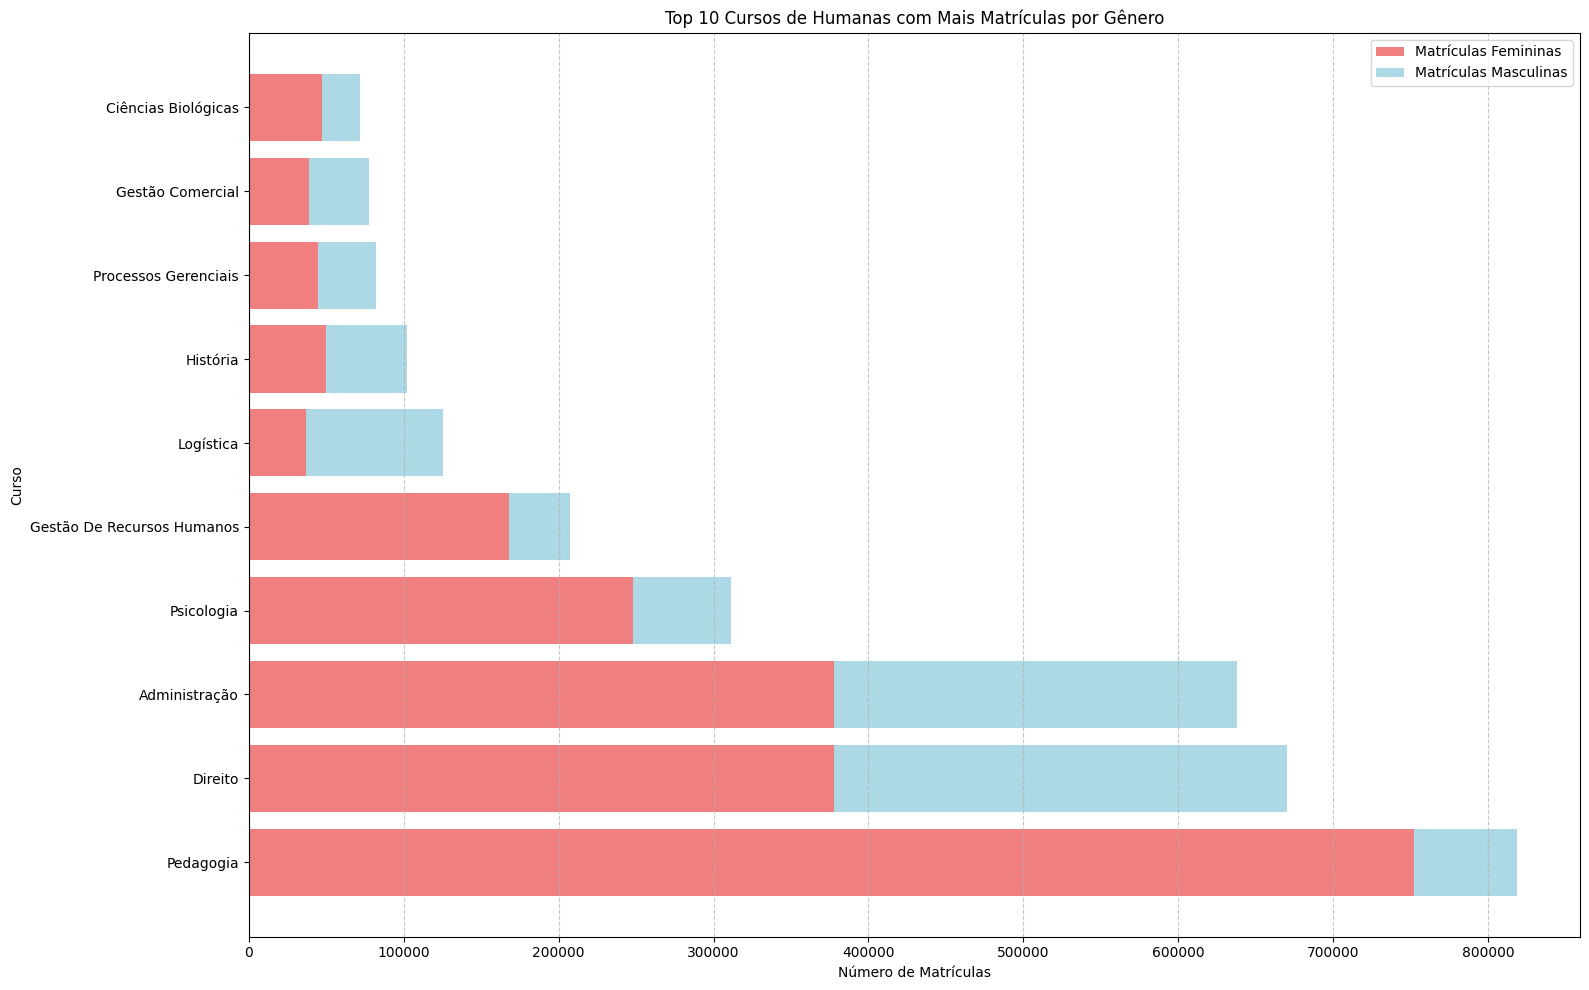

In [24]:
# Top 10 Cursos de Humanas com Mais Matrículas por Gênero 

plt.figure(figsize=(16, 10))
plt.barh(top_humanas.index, top_humanas['QT_MAT_FEM'], color='lightcoral', label='Matrículas Femininas')
plt.barh(top_humanas.index, top_humanas['QT_MAT_MASC'], color='lightblue', left=top_humanas['QT_MAT_FEM'], label='Matrículas Masculinas')

# Títulos e rótulos
plt.xlabel('Número de Matrículas')
plt.ylabel('Curso')
plt.title('Top 10 Cursos de Humanas com Mais Matrículas por Gênero')
plt.legend()

# Grid e visualização
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

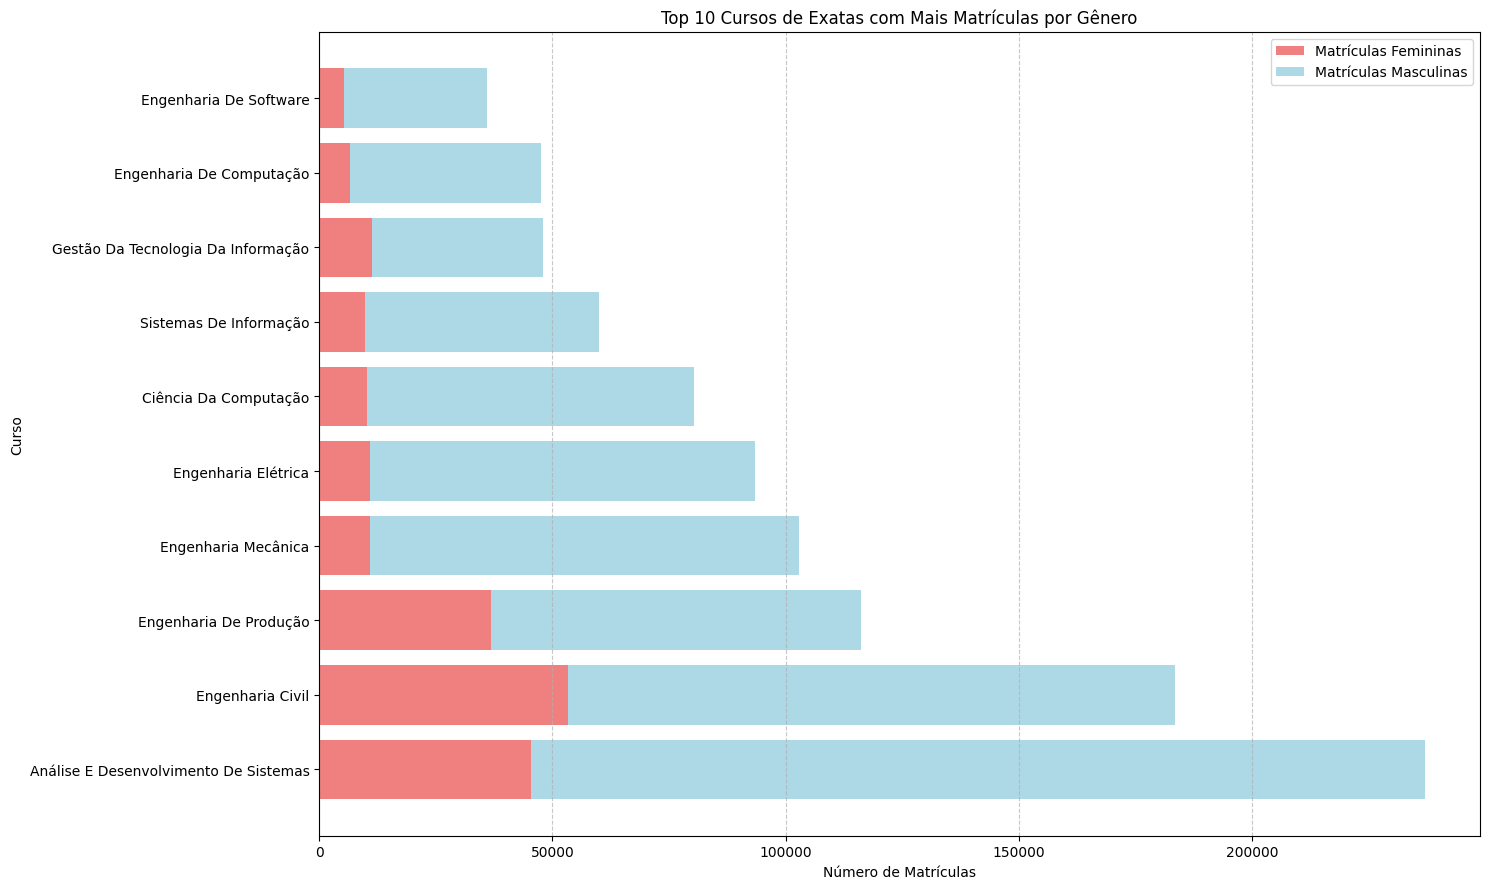

In [28]:
import matplotlib.pyplot as plt

# Top 10 Cursos de Exatas com Mais Matrículas por Gênero
plt.figure(figsize=(15, 9))

# Gráfico de barras horizontais, empilhando matrículas femininas e masculinas
plt.barh(top_exatas.index, top_exatas['QT_MAT_FEM'], color='lightcoral', label='Matrículas Femininas')
plt.barh(top_exatas.index, top_exatas['QT_MAT_MASC'], color='lightblue', left=top_exatas['QT_MAT_FEM'], label='Matrículas Masculinas')

# Títulos e rótulos
plt.xlabel('Número de Matrículas')
plt.ylabel('Curso')
plt.title('Top 10 Cursos de Exatas com Mais Matrículas por Gênero')
plt.legend()

# Grid e visualização
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


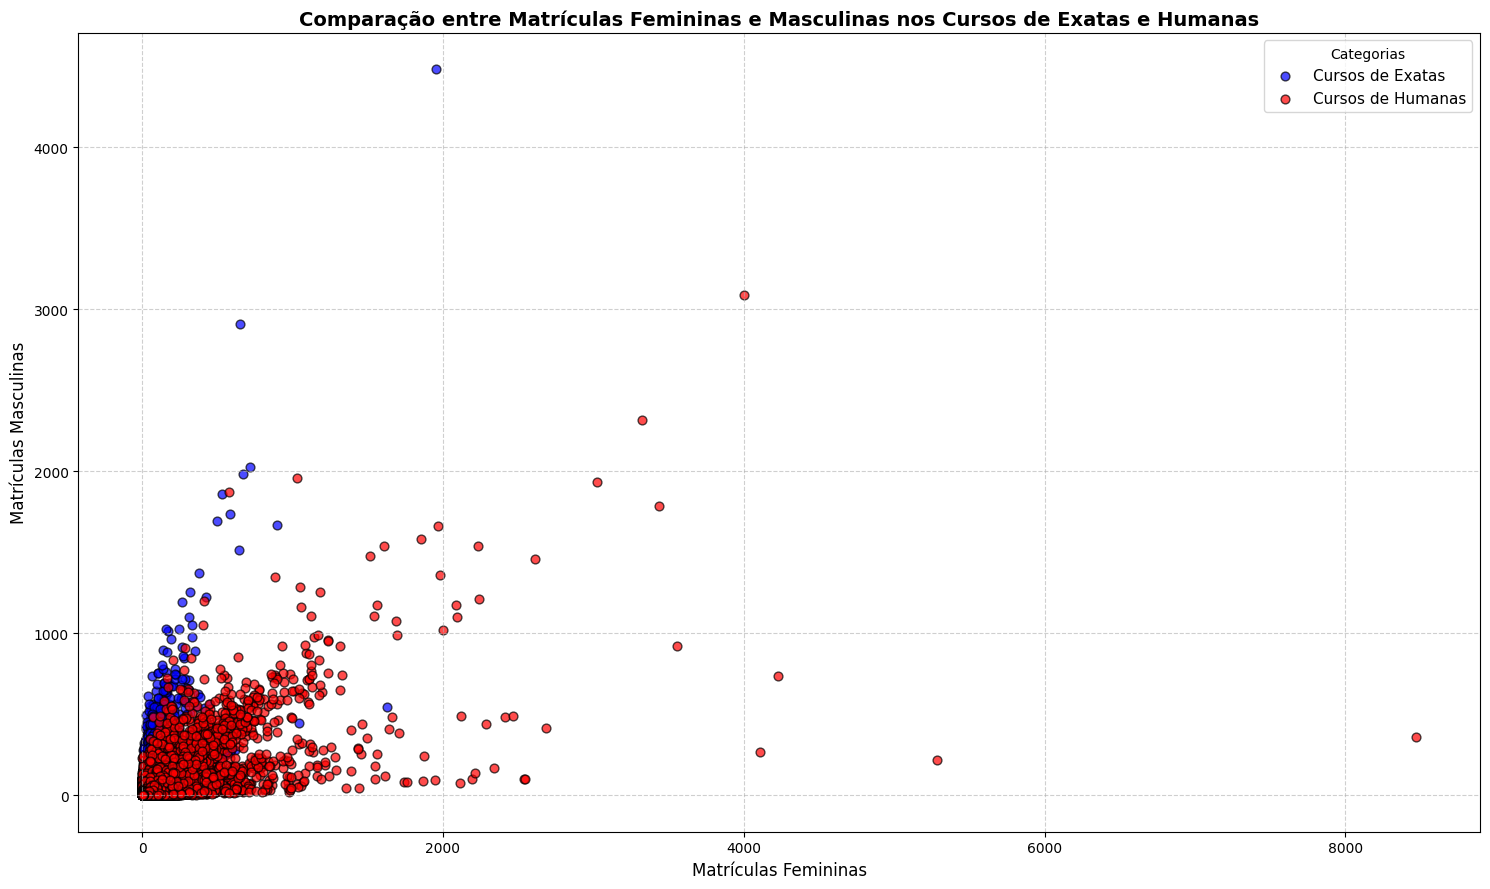

In [31]:

# Configurando o tamanho da figura
plt.figure(figsize=(15, 9))

# Plotando os cursos de Exatas
plt.scatter(
    df_exatas['QT_MAT_FEM'], df_exatas['QT_MAT_MASC'],
    color='blue', s=40, alpha=0.7, edgecolor='k',
    label='Cursos de Exatas'
)

# Plotando os cursos de Humanas
plt.scatter(
    df_humanas['QT_MAT_FEM'], df_humanas['QT_MAT_MASC'],
    color='red', s=40, alpha=0.7, edgecolor='k',
    label='Cursos de Humanas'
)

# Adicionando títulos 
plt.xlabel('Matrículas Femininas', fontsize=12)
plt.ylabel('Matrículas Masculinas', fontsize=12)
plt.title('Comparação entre Matrículas Femininas e Masculinas nos Cursos de Exatas e Humanas', fontsize=14, fontweight='bold')

# Adicionando legenda e grade
plt.legend(title='Categorias', title_fontsize='10', fontsize='11')
plt.grid(True, linestyle='--', alpha=0.6)

# Exibindo o gráfico
plt.tight_layout()
plt.show()


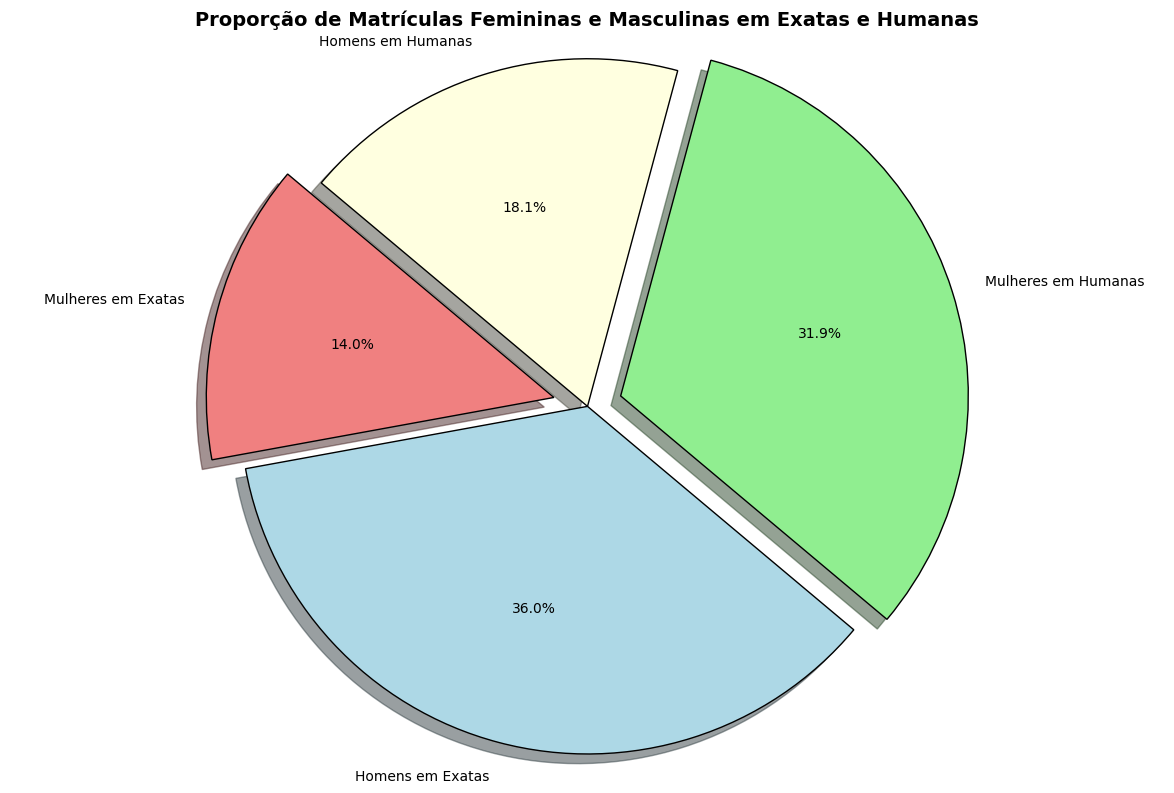

In [44]:

# Dados para o gráfico de pizza
labels = ['Mulheres em Exatas', 'Homens em Exatas', 'Mulheres em Humanas', 'Homens em Humanas']
sizes = [proporcao_fem_exatas * 100, proporcao_masc_exatas * 100, proporcao_fem_humanas * 100, proporcao_masc_humanas * 100]
colors = ['lightcoral', 'lightblue', 'lightgreen', 'lightyellow']
explode = (0.1, 0, 0.1, 0)  # Destaca as fatias para Mulheres em Exatas e Humanas

# Configuração do gráfico de pizza
plt.figure(figsize=(12, 8))
plt.pie(
    sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
    shadow=True, startangle=140, wedgeprops={'edgecolor': 'k'}
)

# Adicionando título
plt.title('Proporção de Matrículas Femininas e Masculinas em Exatas e Humanas', fontsize=14, fontweight='bold')

# Exibindo o gráfico
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()


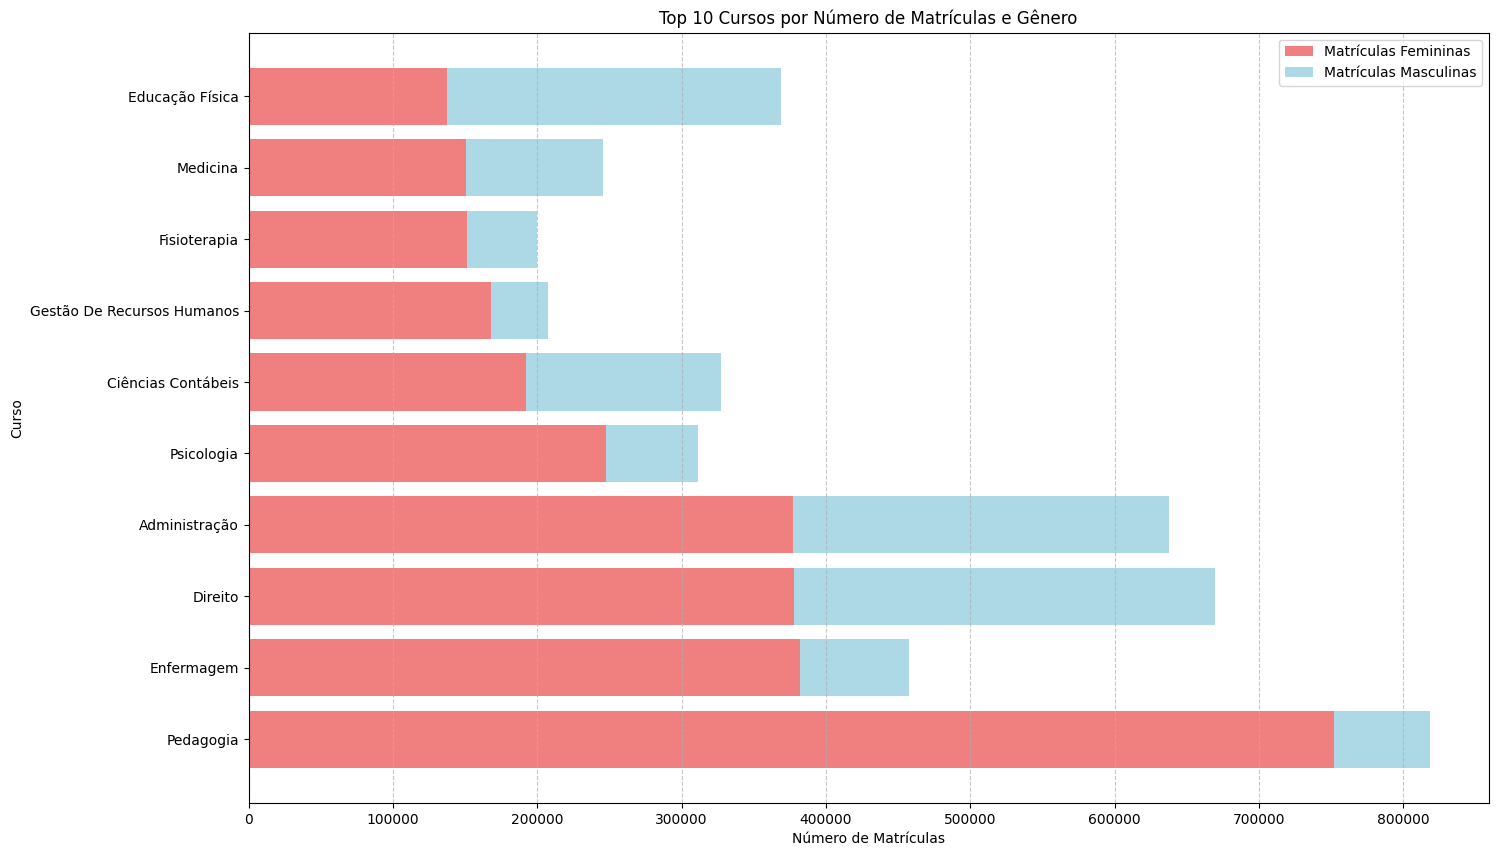

In [36]:
# Top 10 Cursos por Número de Matrículas e Gênero

plt.figure(figsize=(16, 10))
plt.barh(top_cursos['NO_CURSO'], top_cursos['QT_MAT_FEM'], color='lightcoral', label='Matrículas Femininas')
plt.barh(top_cursos['NO_CURSO'], top_cursos['QT_MAT_MASC'], color='lightblue', left=top_cursos['QT_MAT_FEM'], label='Matrículas Masculinas')

plt.xlabel('Número de Matrículas')
plt.ylabel('Curso')
plt.title('Top 10 Cursos por Número de Matrículas e Gênero')
plt.legend()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


## 6. Conclusão

A análise dos microdados do Censo da Educação Superior 2022 revelou importantes tendências sobre a distribuição de gênero nos cursos de Exatas (STEM) e Humanas no Brasil. Observamos que:

    Nos cursos de Exatas, há uma predominância masculina significativa, especialmente em áreas como Engenharia, Computação e Física. Isso reflete um desafio contínuo na promoção da equidade de gênero nessas áreas.
    
    Em contrapartida, os cursos de Humanas, como Pedagogia, Psicologia e Direito, apresentam uma distribuição mais equilibrada, com uma leve predominância feminina em muitas dessas áreas.

Essa disparidade de gênero nas diferentes áreas de conhecimento é um fenômeno que pode estar associado a fatores socioculturais, expectativas de carreira e oportunidades percebidas por homens e mulheres. A partir dessa análise, podemos concluir que ainda há muito a ser feito para alcançar uma maior diversidade e inclusão nas áreas de Exatas.

A compreensão dessas dinâmicas pode auxiliar na formulação de políticas educacionais que incentivem a participação feminina em áreas de STEM e promovam um ambiente acadêmico mais inclusivo para todos.